In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers


In [6]:
data_train_path = "D:/Projects/Image Classifier/collection/Fruits_Vegetables/train"
data_test_path = "D:/Projects/Image Classifier/collection/Fruits_Vegetables/test"
data_validation_path = "D:/Projects/Image Classifier/collection/Fruits_Vegetables/validation"


In [7]:
img_width = 180
img_height = 180


In [8]:
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path,shuffle=True, image_size=(img_width,img_height),batch_size=32,validation_split=False)
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,shuffle=False, image_size=(img_width,img_height),batch_size=32,validation_split=False)
data_val = tf.keras.utils.image_dataset_from_directory(data_validation_path,shuffle=False, image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [9]:
data_cat = data_train.class_names



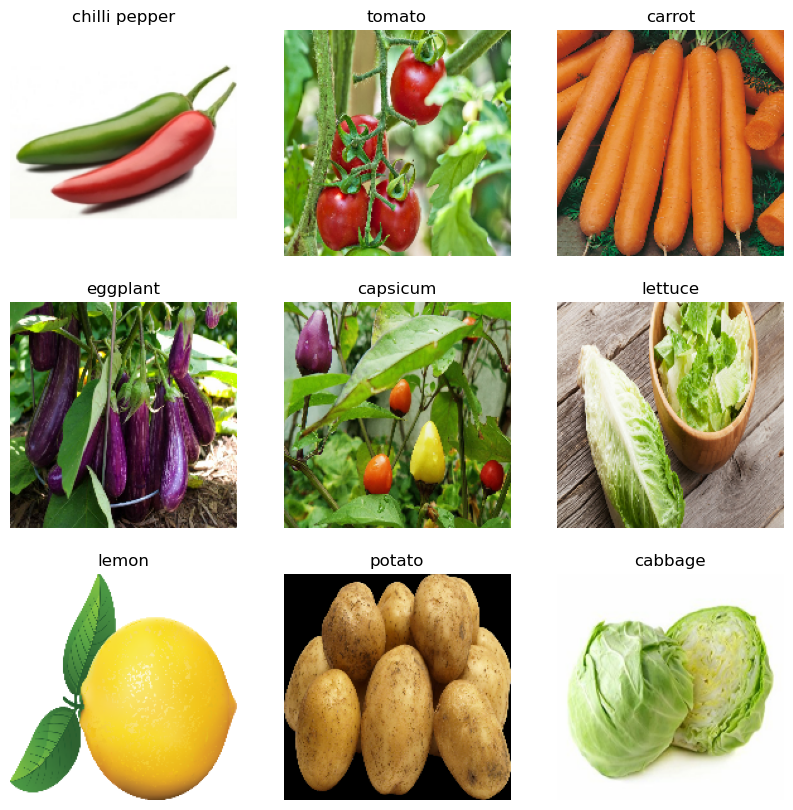

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.0785 - loss: 3.5307 - val_accuracy: 0.3590 - val_loss: 2.1920
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.3317 - loss: 2.3469 - val_accuracy: 0.7037 - val_loss: 1.1784
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5192 - loss: 1.6199 - val_accuracy: 0.8803 - val_loss: 0.5690
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.7566 - loss: 0.8483 - val_accuracy: 0.9060 - val_loss: 0.3668
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.8628 - loss: 0.4791 - val_accuracy: 0.9288 - val_loss: 0.3368
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9314 - loss: 0.2644 - val_accuracy: 0.9487 - val_loss: 0.3351
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9607 - loss: 0.2101 - val_accuracy: 0.9516 - val_loss: 0.3418
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9728 - loss: 0.1415 - val_accuracy: 0.9601 - 

Text(0.5, 1.0, 'Loss')

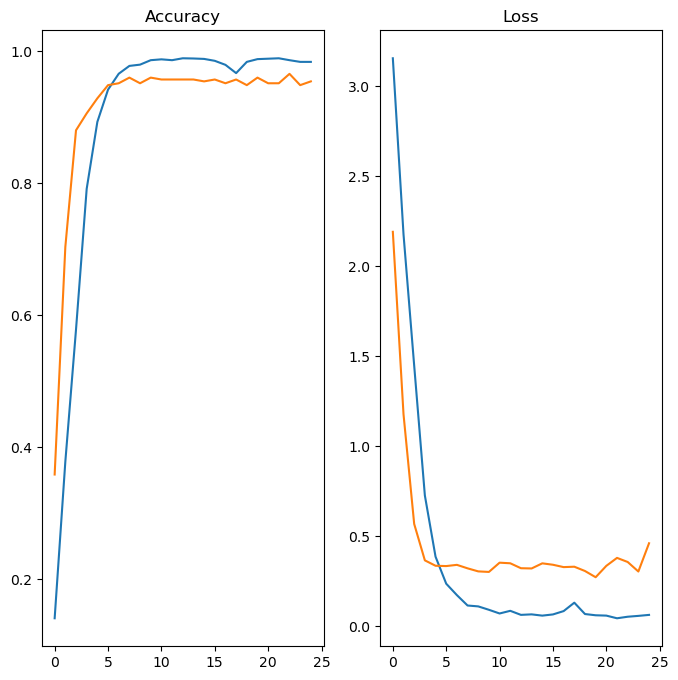

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [40]:
image = 'chilli_pepper.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [42]:
predict = model.predict(img_bat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [44]:
score = tf.nn.softmax(predict)

In [46]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is chilli pepper with accuracy of 63.39


In [48]:
model.save('Image_classify.keras')